# Анализ тарифов сотового оператора

---
На основе выборки из 500 пользователей сотового оператора необходимо проанализировать поведение клиентов и решить, какой из двух тарифов лучше: «Смарт» или «Ультра».

## Описание тарифов
<b>Тариф «Смарт»</b>
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля (значения минут и мегабайтов всега округляют вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей
    
<b>Тариф «Ультра»</b>
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

## План работы над проектом 
1. Открыть файлы с данными, изучить общую информацию.
2. Подготовить данные: привести данные к нужным типам; найти и исправить ошибки в данных (с пояснениями, какие ошибки и как исправлены); 
3. Посчитать для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя.
4. Проанализировать данные: описать поведение клиентов оператора, исходя из выборки (сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц). Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.
5. Проверить гипотезы:
    1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
6. Написать пояснения: 
    1. как формулировались нулевая и альтернативная гипотезы;
    2. какой критерий использовался для проверки гипотез и почему.
7. Написать общий вывод

## Описание данных
Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

---

## Шаг 1. Откроем файлы с данными, изучим общую информацию

In [1]:
import pandas as pd
#import math
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

### Смотрим датасет звонков calls.csv

In [3]:
data_calls.info()
data_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [4]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
data_calls.query("duration == 0").count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

### Смотрим датасет интернет-трафика internet.csv

In [6]:
data_internet.info()
data_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [7]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
data_internet.query("mb_used == 0").count()

Unnamed: 0      19598
id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

### Смотрим датасет СМС messages.csv

In [9]:
data_messages.info()
data_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [10]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


### Смотрим датасет тарифов tariffs.csv

In [11]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Смотрим датасет пользователей users.csv

In [13]:
data_users.info()
data_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [14]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [15]:
#посмотрим, как пользователи распределены по городам
data_users.groupby('city').count().sort_values(by='user_id',ascending = False)

,user_id,age,churn_date,first_name,last_name,reg_date,tariff
city,,,,,,,
Москва,99,99,9,99,99,99,99
Санкт-Петербург,39,39,3,39,39,39,39
Новосибирск,16,16,0,16,16,16,16
Казань,14,14,0,14,14,14,14
Омск,14,14,3,14,14,14,14
...,...,...,...,...,...,...,...
Подольск,1,1,0,1,1,1,1
Химки,1,1,0,1,1,1,1
Иваново,1,1,0,1,1,1,1


In [16]:
#посмотрим, как тарифы распределены по городам
data_users_tariff_city = data_users.pivot_table(index='city', columns='tariff',values='user_id', aggfunc=['count'])
data_users_tariff_city.columns = ['count_smart','count_ultra']

In [17]:
#Горячая десятка пользователей Smart
data_users_tariff_city.sort_values(by = 'count_smart',ascending = False).head(10)

,count_smart,count_ultra
city,,
Москва,67.0,32.0
Санкт-Петербург,30.0,9.0
Казань,13.0,1.0
Новосибирск,11.0,5.0
Омск,10.0,4.0
Ульяновск,10.0,1.0
Екатеринбург,9.0,2.0
Улан-Удэ,7.0,NaN
Самара,7.0,2.0


In [18]:
#Горячая десятка пользователей Ultra
data_users_tariff_city.sort_values(by = 'count_ultra',ascending = False).head(10)

,count_smart,count_ultra
city,,
Москва,67.0,32.0
Санкт-Петербург,30.0,9.0
Уфа,6.0,6.0
Краснодар,6.0,5.0
Новосибирск,11.0,5.0
Воронеж,1.0,5.0
Пенза,1.0,5.0
Омск,10.0,4.0
Набережные Челны,7.0,4.0


In [19]:
#посмотрим, на каких тарифах сидят пользователи в выборке
data_users.groupby('tariff').count()

,user_id,age,churn_date,city,first_name,last_name,reg_date
tariff,,,,,,,
smart,351,351,23,351,351,351,351
ultra,149,149,15,149,149,149,149


In [20]:
#посмотрим записи пользователей, расторгнувших договор - нет ли каких закономерностей
data_users.query("churn_date == churn_date") 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


In [21]:
data_users.query("churn_date == churn_date").groupby('tariff').count()

,user_id,age,churn_date,city,first_name,last_name,reg_date
tariff,,,,,,,
smart,23,23,23,23,23,23,23
ultra,15,15,15,15,15,15,15


In [22]:
#Есть ли дубликаты
print(data_calls.duplicated().sum())
print(data_internet.duplicated().sum())
print(data_messages.duplicated().sum())
print(data_users.duplicated().sum())

0
0
0
0


## Выводы по шагу 1

1. В датасете звонков, как и предупреждали, есть звонки с нулевой продолжительностью (39613 из 202607)
2. В датасете интернет-трафика есть сессии с 0 Мб (19598 из 149396)
3. В датасетах нет пропусков - удивительно! (не считая пропусков в столбце churn_date в датасете пользователей, но в данном случае это не ошибка, а признак того, что пользователь действующий).
4. 20% пользователей в выборке - из Москвы
5. Пользователей тарифа Smart в выборке в 2 с лишним раза больше чем пользователей тарифа Ultra
6. Среди 38 пользователей, расторгнувших договор, пользователей тарифа Smart в полтора раза больше, чем пользователей Ultra
7. Дубликатов в датасетах нет.
---

## Шаг 2. Подготовим данные
1. Приведем данные к нужным типам.


2. Найдем и исправим ошибки в данных (с пояснениями).


3. Посчитаем для каждого пользователя:

    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифа; прибавим абонплату).

In [23]:
###data_calls
#call_date - меняем тип данных на date
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'],format='%Y-%m-%d')
#duration - округляем в большую сторону
data_calls['duration'] = np.ceil(data_calls['duration'])
#duration - меняем тип данных на int
data_calls['duration'] = data_calls['duration'].astype('int')
#0 в столбце duration округляем до 1
data_calls.loc[data_calls['duration'] == 0,'duration'] = 1
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [24]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [25]:
###data_internet
#удаляем столбец Unnamed: 0
data_internet.drop(['Unnamed: 0'], axis='columns', inplace=True)
#столбец mb_used округляем до мегабайт в большую сторону
data_internet['mb_used'] = np.ceil(data_internet['mb_used'])
#столбец mb_used приводим к типу int
data_internet['mb_used'] = data_internet['mb_used'].astype('int')
#столбец session_date (дата сессии) приводим к типу date.
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'],format='%Y-%m-%d')
#0 в столбце mb_used округляем до 1
data_internet.loc[data_internet['mb_used'] == 0,'mb_used'] = 1
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


In [26]:
data_internet.head(20)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
5,1000_5,400,2018-10-02,1000
6,1000_6,541,2018-09-07,1000
7,1000_7,416,2018-07-11,1000
8,1000_8,506,2018-10-08,1000
9,1000_9,346,2018-09-03,1000


In [27]:
###data_messages
#столбец message_date (дата СМС) приводим к типу date.
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'],format='%Y-%m-%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [28]:
###data_users
#столбец churn_date (дата расторжения договора) приводим к типу date
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'],format='%Y-%m-%d')
#столбец reg_date (дата заключения договора) приводим к типу date
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'],format='%Y-%m-%d')
#если нужно удалить пользователей с разорванным договором - раскомментировать строку ниже
#data_users = data_users.loc[data_users.loc[:,'churn_date'].isnull()].reset_index(drop=True)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [29]:
#Функция извлечения месяца из даты
def MonthCategorizer(param_date):
    return param_date.month

In [30]:
##Считаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

#категоризируем столбец call_date
data_calls['month'] = data_calls['call_date'].apply(MonthCategorizer)

#суммируем минуты, 
data_calls_month_sum = data_calls.groupby(['user_id', 'month'])['duration'].sum()
data_calls_month_sum = data_calls_month_sum.reset_index(level = 'month')
data_calls_month_sum.head()

,month,duration
user_id,,
1000,5,164
1000,6,187
1000,7,346
1000,8,418
1000,9,478


In [31]:
#считаем звонки
data_calls_month_count = data_calls.groupby(['user_id', 'month'])['duration'].count()
data_calls_month_count = data_calls_month_count.reset_index(level = 'month')
data_calls_month_count.columns = ['month','calls']
data_calls_month_count.head()

,month,calls
user_id,,
1000,5,22
1000,6,43
1000,7,47
1000,8,52
1000,9,58


In [32]:
##Считаем для каждого пользователя количество отправленных сообщений по месяцам
#категоризируем столбец message_date
data_messages['month'] = data_messages['message_date'].apply(MonthCategorizer)
#считаем количество сообщений 
data_messages_month_count = data_messages.groupby(['user_id', 'month'])['id'].count()
data_messages_month_count = data_messages_month_count.reset_index(level = 'month')
data_messages_month_count.columns = ['month','messages']
data_messages_month_count.head()

,month,messages
user_id,,
1000,5,22
1000,6,60
1000,7,75
1000,8,81
1000,9,57


In [33]:
##Считаем для каждого пользователя объем израсходованного интернет-трафика по месяцам
#категоризируем столбец session_date
data_internet['month'] = data_internet['session_date'].apply(MonthCategorizer)
#считаем трафик
data_internet_month_sum = data_internet.groupby(['user_id', 'month'])['mb_used'].sum()
data_internet_month_sum = data_internet_month_sum.reset_index(level = 'month')
data_internet_month_sum.head()

,month,mb_used
user_id,,
1000,5,2257
1000,6,23262
1000,7,14017
1000,8,14072
1000,9,14583


In [34]:
#объединяем полученные таблицы в одну - data_services
data_services = (
    data_calls_month_sum.merge(data_calls_month_count, on=['user_id','month'], how='outer').
    merge(data_messages_month_count, on=['user_id','month'], how='outer').
    merge(data_internet_month_sum, on=['user_id','month'], how='outer').
    sort_values(by = ['user_id','month'])
)

In [35]:
pd.set_option('display.max_rows', None)

#заполняем пропуски (NaN) в data_services нулями (0)
data_services = data_services.fillna(0)
data_services = data_services.reset_index()
data_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
duration    3214 non-null float64
calls       3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


In [36]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [37]:
#категоризируем столбец reg_date
data_users['reg_month'] = data_users['reg_date'].apply(MonthCategorizer)

#выделяем из data_users столбцы user_id и tariff и reg_month в отдельную таблицу
data_users_tariff = data_users[['user_id','tariff','reg_month','city']]
#добавляем в data_services столбец с указанием тарифа
for i in range(data_users.shape[0]):
    param_user_id = data_users_tariff['user_id'][i]
    param_tariff = data_users_tariff['tariff'][i]
    param_reg_month = data_users_tariff['reg_month'][i]
    param_city = data_users_tariff['city'][i]
    data_services.loc[data_services['user_id'] == param_user_id, 'tariff'] = param_tariff
    data_services.loc[data_services['user_id'] == param_user_id, 'reg_month'] = int(param_reg_month)
    data_services.loc[data_services['user_id'] == param_user_id, 'city'] = param_city

In [38]:
#добавляем столбцы с условиями тарифа
for i in range(data_tariffs.shape[0]):
    param_tariff_name = data_tariffs['tariff_name'][i]
    #это можно как-то поизящней наверно сделать
    data_services.loc[data_services['tariff'] == param_tariff_name, 'messages_included'] = data_tariffs['messages_included'][i]
    data_services.loc[data_services['tariff'] == param_tariff_name, 'mb_per_month_included'] = data_tariffs['mb_per_month_included'][i]    
    data_services.loc[data_services['tariff'] == param_tariff_name, 'minutes_included'] = data_tariffs['minutes_included'][i]    
    data_services.loc[data_services['tariff'] == param_tariff_name, 'rub_monthly_fee'] = data_tariffs['rub_monthly_fee'][i]    
    data_services.loc[data_services['tariff'] == param_tariff_name, 'rub_per_gb'] = data_tariffs['rub_per_gb'][i]    
    data_services.loc[data_services['tariff'] == param_tariff_name, 'rub_per_message'] = data_tariffs['rub_per_message'][i]    
    data_services.loc[data_services['tariff'] == param_tariff_name, 'rub_per_minute'] = data_tariffs['rub_per_minute'][i]    

In [39]:
#Функция расчета помесячной выручки с каждого пользователя
def MoneyCalc(row):
    money_calls = (row['duration'] - row['minutes_included'])*row['rub_per_minute']
    if money_calls < 0:
        money_calls = 0
    
    money_messages = (row['messages'] - row['messages_included'])*row['rub_per_message']
    if money_messages < 0:
        money_messages = 0
    
    money_internet = ((row['mb_used'] - row['mb_per_month_included'])/1024)*row['rub_per_gb']
    if money_internet < 0:
        money_internet = 0
    
    money_total =  money_calls + money_messages + money_internet + row['rub_monthly_fee']
    return money_total

In [40]:
#считаем помесячную выручку с каждого пользователя
data_services['money'] = data_services.apply(MoneyCalc, axis=1)

## Выводы по шагу 2

1. Датасет звонков data_calls
    * столбец call_date (дата звонка) привели к типу date;
    * столбец duration (продолжительность звонка) округлили до минут в большую сторону (у нас же поминутная тарификация) и привели к типу int;
    * записи с нулевым значением в столбце duration округлили до 1 мин.


2. Датасет интернет-трафика data_internet
    * столбец Unnamed: 0 удалили (дублировал индексы);
    * столбец mb_used (количество мегабайт) округлили до мегабайт в большую сторону и привели к типу int;
    * столбец session_date (дата сессии) привели к типу date.
    * записи с нулевым значением в столбце mb_used округлили до 1 Мб.


3. Датасет СМС data_messages
    * столбец message_date (дата СМС) привели к типу date.


4. Датасет пользователей data_users
    * столбец churn_date (дата расторжения договора) привели к типу date
    * столбец reg_date (дата заключения договора) привели к типу date
    * можно было бы удалить записи, где churn_date != NaN (с разорванным договором, недействующие пользователи, не системные, не принесут прибыли в дальнейшем, нет смысла их анализировать), но их удаление особо ни на что не повлияет - с тем же успехом можно было бы удалить пользователей, присоединившихся лишь в конце года, но тогда так и выборки не останется.


5. Посчитали для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.


6. Посчитали для каждого пользователя количество отправленных сообщений по месяцам.


7. Посчитали для каждого пользователя объем израсходованного интернет-трафика по месяцам.


8. Посчитали помесячную выручку с каждого пользователя 
<small>(вычли бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножили на значение из тарифного плана; прибавили абонплату по тарифу).</small>

---

## Шаг 3. Проанализируем данные
1. Опишем поведение клиентов оператора, исходя из выборки. 
2. Проанализируем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 
3. Посчитаем среднее количество, дисперсию и стандартное отклонение. 
4. Построим гистограммы. Опишем распределения.

In [41]:
data_services.describe()

,user_id,month,duration,calls,messages,mb_used,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,463.570006,63.038892,38.281269,17233.682950,4.719042,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057,1499.400955
std,144.659172,2.905413,247.918544,33.236368,36.148326,7579.211552,2.908036,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199,787.006116
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,550.000000
25%,1125.000000,6.000000,291.000000,40.000000,9.000000,12507.750000,2.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,713.830078
50%,1253.000000,9.000000,456.000000,62.000000,30.000000,16969.500000,4.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,1591.011719
75%,1378.750000,11.000000,605.000000,82.000000,57.000000,21453.500000,7.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,1950.000000
max,1499.000000,12.000000,1727.000000,244.000000,224.000000,49793.000000,12.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,6768.335938


In [42]:
#Функция построения гистограммы (интервал рассчитываем с помощью квартилей)
def HistBuilder(param):
    res_des = param.describe()

    iqr = res_des[6] - res_des[4]
    k = 3
    b = 12
    
    range_s = res_des[4]-k*iqr
    if range_s < res_des[3]:
        range_s = res_des[3]

    range_f = res_des[6]+k*iqr
    if range_f > res_des[7]:
        range_f = res_des[7]

    param.hist(bins=b,range=(range_s,range_f))

In [43]:
#Функция построения графика с данными по двум тарифам
def PlotBuilder2Hist(param,data_des1,data_des2,hist_title,label1,label2):
    b=12
    a=0.5
    ax = data_services_ultra.plot(kind='hist', color='darkblue', y=param, histtype='step', range=(data_des1[param][3],data_des1[param][7]), linewidth=3, bins=b, alpha=a, label=label1)
    data_services_smart.plot(title=hist_title,kind='hist', color='orange', y=param, histtype='step', range=(data_des2[param][3],data_des2[param][7]), linewidth=3, bins=b, alpha=a, label=label2, ax=ax, grid=True, legend=True)

In [44]:
#делим датасет на два в зависимости от тарифа
data_services_ultra = data_services.query('tariff == "ultra"').reset_index(drop=True)
data_services_smart = data_services.query('tariff == "smart"').reset_index(drop=True)
des_ultra = data_services_ultra.describe()
des_smart = data_services_smart.describe()

In [45]:
des_ultra

,user_id,month,duration,calls,messages,mb_used,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000
mean,1263.094416,8.250761,540.779695,73.392893,49.363452,19488.703553,4.629442,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2060.591390
std,140.694908,2.871762,325.738740,43.916853,47.804457,10097.107541,2.734109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.428319
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,292.000000,41.000000,6.000000,11787.000000,2.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,532.000000,74.000000,38.000000,19324.000000,4.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,11.000000,773.000000,104.000000,79.000000,26866.000000,6.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,12.000000,1727.000000,244.000000,224.000000,49793.000000,12.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4743.896484


In [46]:
des_smart

,user_id,month,duration,calls,messages,mb_used,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000
mean,1246.506505,8.346792,429.450875,58.463437,33.384029,16237.184388,4.758636,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1251.409667
std,146.119496,2.920316,194.871174,25.939858,28.227876,5879.795158,2.981402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,797.708109
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,291.000000,40.000000,10.000000,12662.000000,2.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,553.000000
50%,1239.000000,9.000000,435.000000,60.000000,28.000000,16540.000000,4.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,987.664062
75%,1376.000000,11.000000,560.000000,76.000000,51.000000,20078.000000,7.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1703.507812
max,1499.000000,12.000000,1471.000000,198.000000,143.000000,38627.000000,12.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6768.335938


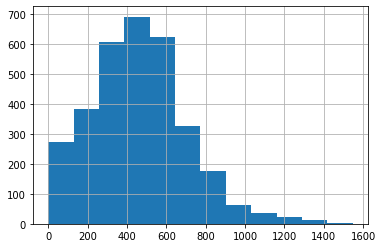

In [47]:
#Общая гистограмма минут разговора
HistBuilder(data_services['duration'])

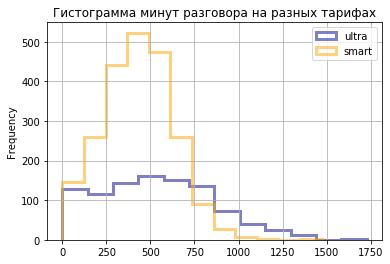

In [48]:
#Гистограмма минут в зависимости от тарифа
PlotBuilder2Hist('duration',des_ultra,des_smart,'Гистограмма минут разговора на разных тарифах','ultra','smart')

<font color='green'>Очень наглядно!

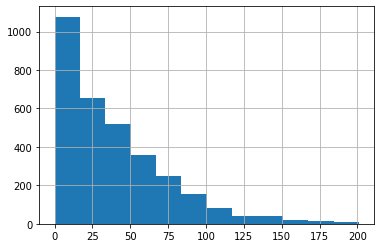

In [49]:
#Общая гистограмма сообщений
HistBuilder(data_services['messages'])

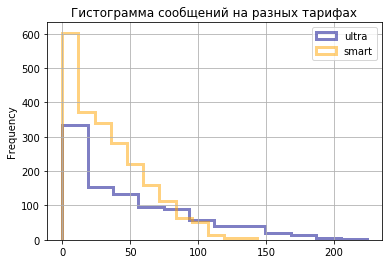

In [50]:
#Гистограмма сообщений в зависимости от тарифа
PlotBuilder2Hist('messages',des_ultra,des_smart,'Гистограмма сообщений на разных тарифах','ultra','smart')

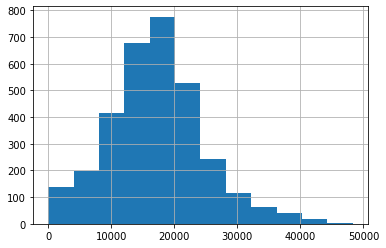

In [51]:
#Общая гистограмма интернет-трафика
HistBuilder(data_services['mb_used'])

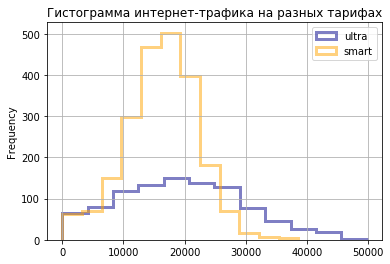

In [52]:
#Гистограмма интернет-трафика в зависимости от тарифа
PlotBuilder2Hist('mb_used',des_ultra,des_smart,'Гистограмма интернет-трафика на разных тарифах','ultra','smart')

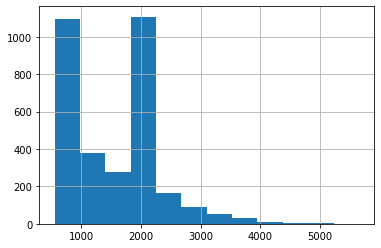

In [53]:
#Общая гистограмма выручки
HistBuilder(data_services['money'])

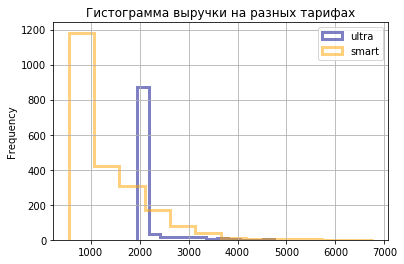

In [54]:
#Гистограмма выручки в зависимости от тарифа
PlotBuilder2Hist('money',des_ultra,des_smart,'Гистограмма выручки на разных тарифах','ultra','smart')

In [55]:
#Сделаем отдельно для каждого тарифа отбор нормальных значений на основании диаграмм размаха - отсекем все, что за усами (1.5IQR).

In [56]:
#Функция построения диаграммы размаха
def BoxplotBuilder(data,param):
    res_des = data[param].describe()
    iqr = res_des[6] - res_des[4]
    k_box = 3
    k_garbage = 1.5
    
    #Рисуем диаграмму размаха    
    range_s = res_des[4]-k_box*iqr
    if range_s < res_des[3]:
        range_s = res_des[3]

    range_f = res_des[6]+k_box*iqr
    if range_f > res_des[7]:
        range_f = res_des[7]

    plt.ylim(range_s, range_f)
    data.boxplot(param)

    #Считаем границы отсечения
    garbage_bot = res_des[4]-k_garbage*iqr
    if garbage_bot < res_des[3]:
        garbage_bot = res_des[3]

    garbage_top = res_des[6]+k_garbage*iqr
    if garbage_top > res_des[7]:
        garbage_top = res_des[7]
    
    print('Отбрасываем значения',param,'<',garbage_bot,'и >',garbage_top)
    garbage =[garbage_bot,garbage_top]
    
    return garbage   

Отбрасываем значения duration < 0.0 и > 1494.5


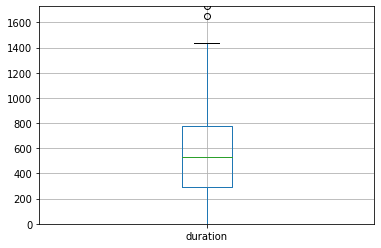

In [57]:
#Уберём редкие и выбивающиеся значения для продолжительности звонков (duration) для тарифа ultra
garbage_duration = BoxplotBuilder(data_services_ultra,'duration')
data_services_ultra_wo_anomaly = data_services_ultra.query('duration >= @garbage_duration[0] and duration <= @garbage_duration[1]')

Отбрасываем значения duration < 0.0 и > 963.5


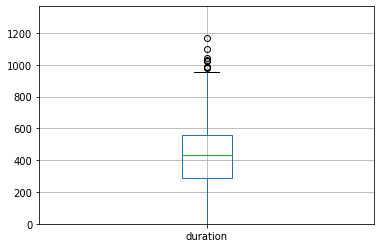

In [58]:
#Уберём редкие и выбивающиеся значения для продолжительности звонков (duration) для тарифа smart
garbage_duration = BoxplotBuilder(data_services_smart,'duration')
data_services_smart_wo_anomaly = data_services_smart.query('duration >= @garbage_duration[0] and duration <= @garbage_duration[1]')

Отбрасываем значения messages < 0.0 и > 188.5


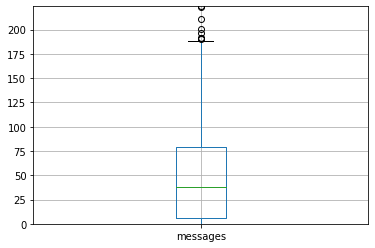

In [59]:
#Уберём редкие и выбивающиеся значения для сообщений (messages) для тарифа ultra
garbage_messages = BoxplotBuilder(data_services_ultra,'messages')
data_services_ultra_wo_anomaly = data_services_ultra.query('messages >= @garbage_messages[0] and messages <= @garbage_messages[1]')

Отбрасываем значения messages < 0.0 и > 112.5


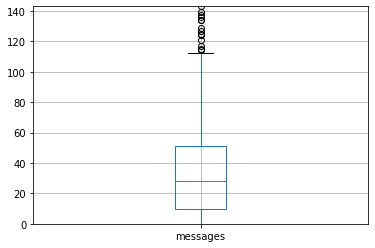

In [60]:
#Уберём редкие и выбивающиеся значения для сообщений (messages) для тарифа smart
garbage_messages = BoxplotBuilder(data_services_smart,'messages')
data_services_smart_wo_anomaly = data_services_smart.query('messages >= @garbage_messages[0] and messages <= @garbage_messages[1]')

Отбрасываем значения mb_used < 0.0 и > 49484.5


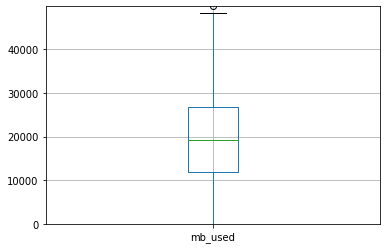

In [61]:
#Уберём редкие и выбивающиеся значения для интернет-трафика (mb_used) для тарифа ultra
garbage_mb_used = BoxplotBuilder(data_services_ultra,'mb_used')
data_services_ultra_wo_anomaly = data_services_ultra.query('mb_used >= @garbage_mb_used[0] and mb_used <= @garbage_mb_used[1]')

Отбрасываем значения mb_used < 1538.0 и > 31202.0


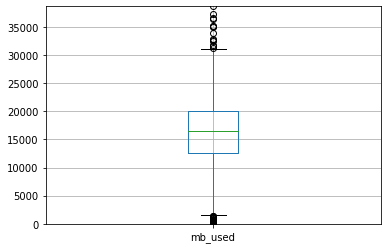

In [62]:
#Уберём редкие и выбивающиеся значения для интернет-трафика (mb_used) для тарифа smart
garbage_mb_used = BoxplotBuilder(data_services_smart,'mb_used')
data_services_smart_wo_anomaly = data_services_smart.query('mb_used >= @garbage_mb_used[0] and mb_used <= @garbage_mb_used[1]')

In [63]:
print('Отбросили редкие и выпадающие значения отдельно по каждому тарифу:')
print('осталось у нас по тарифу Ultra из',len(data_services_ultra),'записей',len(data_services_ultra_wo_anomaly),'(',round(len(data_services_ultra_wo_anomaly)*100/len(data_services_ultra),2),'%),')
print('а по тарифу Smart из',len(data_services_smart),'-',len(data_services_smart_wo_anomaly),'(',round(len(data_services_smart_wo_anomaly)*100/len(data_services_smart),2),'%),')

Отбросили редкие и выпадающие значения отдельно по каждому тарифу:
осталось у нас по тарифу Ultra из 985 записей 984 ( 99.9 %),
а по тарифу Smart из 2229 - 2192 ( 98.34 %),


In [64]:
#Функция построения диаграм рассеяния из таблиц c разными тарифами
def ScatterBuilder(param_x,param_y,param_txt):
    print('Коэффициент корреляции Пирсона для выручки и',param_txt,'для тарифа Ultra',data_services_ultra_wo_anomaly[param_x].corr(data_services_ultra_wo_anomaly[param_y]))
    print('Коэффициент корреляции Пирсона для выручки и',param_txt,'для тарифа Smart',data_services_smart_wo_anomaly[param_x].corr(data_services_smart_wo_anomaly[param_y]))

    a = 0.3
    ax =data_services_ultra_wo_anomaly.plot(color='darkblue', x=param_x, y=param_y, kind='scatter',grid=True, alpha=a, label='ultra')
    data_services_smart_wo_anomaly.plot(color='orange', x=param_x, y=param_y, kind='scatter',grid=True, alpha=a, label='smart', ax=ax, legend=True)    

Коэффициент корреляции Пирсона для выручки и продолжительности звонков для тарифа Ultra 0.07660859235710467
Коэффициент корреляции Пирсона для выручки и продолжительности звонков для тарифа Smart 0.4233119535771836


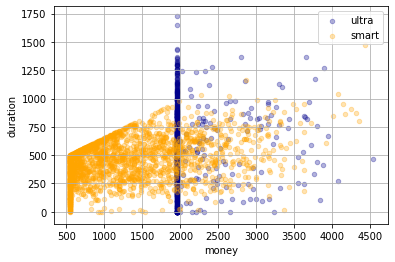

In [65]:
ScatterBuilder('money','duration','продолжительности звонков')

Коэффициент корреляции Пирсона для выручки и СМС для тарифа Ultra 0.005980677101131312
Коэффициент корреляции Пирсона для выручки и СМС для тарифа Smart 0.12583141219587549


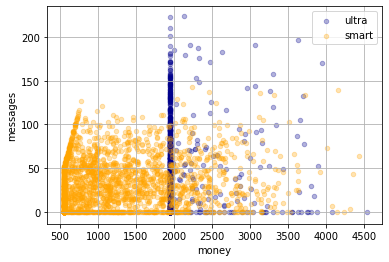

In [66]:
ScatterBuilder('money','messages','СМС')

Коэффициент корреляции Пирсона для выручки и интернет-трафика для тарифа Ultra 0.6071696666722434
Коэффициент корреляции Пирсона для выручки и интернет-трафика для тарифа Smart 0.8318134661816928


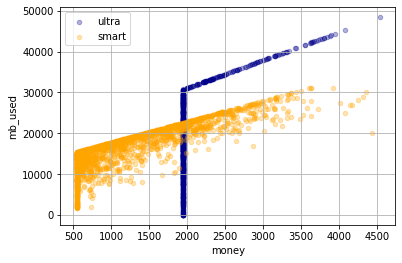

In [67]:
ScatterBuilder('money','mb_used','интернет-трафика')

In [68]:
#ну и так еще посмотрим
data_services_ultra_wo_anomaly.corr()

,user_id,month,duration,calls,messages,mb_used,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money
user_id,1.000000,-0.023830,0.065427,0.065177,-0.002121,0.137455,-0.054033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042309
month,-0.023830,1.000000,0.135648,0.135946,0.198906,0.138993,0.486465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081400
duration,0.065427,0.135648,1.000000,0.989102,0.079718,0.172353,-0.033075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076609
calls,0.065177,0.135946,0.989102,1.000000,0.085199,0.172466,-0.030707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073010
messages,-0.002121,0.198906,0.079718,0.085199,1.000000,0.170115,0.218666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005981
mb_used,0.137455,0.138993,0.172353,0.172466,0.170115,1.000000,-0.023762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607170
reg_month,-0.054033,0.486465,-0.033075,-0.030707,0.218666,-0.023762,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041913
messages_included,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_per_month_included,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minutes_included,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#ну и так еще посмотрим
data_services_smart_wo_anomaly.corr()

,user_id,month,duration,calls,messages,mb_used,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money
user_id,1.000000,-0.015831,-0.012683,-0.009599,0.055451,-0.023360,-0.029413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000910
month,-0.015831,1.000000,0.190695,0.197914,0.062115,0.216428,0.511238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174593
duration,-0.012683,0.190695,1.000000,0.973182,0.186305,0.290813,0.024445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423312
calls,-0.009599,0.197914,0.973182,1.000000,0.190997,0.304914,0.025202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.417385
messages,0.055451,0.062115,0.186305,0.190997,1.000000,0.124405,-0.063142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125831
mb_used,-0.023360,0.216428,0.290813,0.304914,0.124405,1.000000,0.002399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.831813
reg_month,-0.029413,0.511238,0.024445,0.025202,-0.063142,0.002399,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069014
messages_included,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_per_month_included,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minutes_included,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
data_services_ultra_wo_anomaly.describe()

,user_id,month,duration,calls,messages,mb_used,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.0,984.0,984.0,984.0,984.0,984.0,984.0,984.000000
mean,1263.235772,8.248984,540.061992,73.313008,49.290650,19457.906504,4.625000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2057.864454
std,140.696456,2.872680,325.124252,43.867525,47.774105,10055.849724,2.731942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,346.176683
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,291.750000,41.000000,6.000000,11778.500000,2.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,531.500000,73.500000,38.000000,19320.500000,4.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,11.000000,771.500000,103.250000,78.250000,26857.000000,6.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,12.000000,1727.000000,244.000000,224.000000,48397.000000,12.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4539.404297


In [71]:
data_services_smart_wo_anomaly.describe()

,user_id,month,duration,calls,messages,mb_used,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.0,2192.0,2192.0,2192.0,2192.0,2192.0,2192.0,2192.000000
mean,1246.297445,8.350821,431.819799,58.781478,33.665146,16284.768704,4.719434,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1235.648245
std,146.198807,2.906988,190.843765,25.360336,28.156700,5521.450635,2.960446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,743.762579
min,1001.000000,1.000000,0.000000,0.000000,0.000000,1602.000000,1.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,295.000000,40.000000,10.000000,12781.500000,2.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,562.000000
50%,1239.000000,9.000000,436.000000,60.000000,28.500000,16568.000000,4.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,990.484375
75%,1376.000000,11.000000,560.250000,76.000000,51.000000,20044.500000,7.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1684.005859
max,1499.000000,12.000000,1471.000000,198.000000,143.000000,31126.000000,12.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,4431.757812


In [72]:
##Медианная и средняя продолжительность звонков по месяцам - Ultra
data_duration_med_mean_ultra = data_services_ultra_wo_anomaly.groupby('month')['duration'].agg(['median','mean'])
data_duration_med_mean_ultra

,median,mean
month,,
1,399.0,440.888889
2,174.0,304.666667
3,427.0,503.081081
4,468.0,470.072727
5,530.0,524.865672
6,495.5,492.428571
7,558.0,560.296703
8,516.0,524.570093
9,538.0,553.643478


In [73]:
##Медианная и средняя продолжительность звонков по месяцам - Smart
data_duration_med_mean_smart = data_services_smart_wo_anomaly.groupby('month')['duration'].agg(['median','mean'])
data_duration_med_mean_smart

,median,mean
month,,
1,184.0,217.562500
2,272.0,320.345455
3,420.0,400.532468
4,386.0,386.155963
5,444.0,401.235714
6,415.0,412.837500
7,427.0,422.557789
8,446.5,434.829060
9,448.0,444.591440


In [74]:
def BarBuilder(data1,data2,title_bar,label1,label2):
    ax = data1.plot(kind='bar', color='darkblue', y='mean', label=label1,position=1)
    data2.plot(title=title_bar,kind='bar',position=0.5, color='orange', y='mean', label=label2, ax=ax, grid=True, legend=True)

Средняя продолжительность звонков на тарифе Ultra: 509 минут в месяц.
Средняя продолжительность звонков на тарифе Smart: 401 минут в месяц.


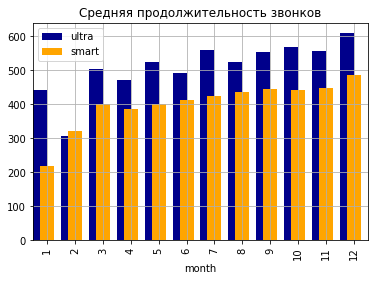

In [75]:
#График средних значений продолжительности звонков помесячно для тарифов ultra и smart
BarBuilder(data_duration_med_mean_ultra,data_duration_med_mean_smart,'Средняя продолжительность звонков','ultra','smart')
print('Средняя продолжительность звонков на тарифе Ultra:',int(round(data_duration_med_mean_ultra['mean'].mean(),0)),'минут в месяц.')
print('Средняя продолжительность звонков на тарифе Smart:',int(round(data_duration_med_mean_smart['mean'].mean(),0)),'минут в месяц.')

In [76]:
##Медианное и среднее количество сообщений по месяцам - Ultra
data_messages_med_mean_ultra = data_services_ultra_wo_anomaly.groupby('month')['messages'].agg(['median','mean'])
data_messages_med_mean_ultra

,median,mean
month,,
1,32.0,33.777778
2,5.5,21.958333
3,20.0,32.297297
4,17.0,31.563636
5,25.0,37.850746
6,27.5,41.726190
7,38.0,49.846154
8,40.0,48.439252
9,43.0,52.286957


In [77]:
##Медианное и среднее количество сообщений по месяцам - Smart
data_messages_med_mean_smart = data_services_smart_wo_anomaly.groupby('month')['messages'].agg(['median','mean'])
data_messages_med_mean_smart

,median,mean
month,,
1,16.0,18.906250
2,20.0,24.800000
3,23.0,31.857143
4,29.0,31.532110
5,30.0,34.014286
6,28.5,34.175000
7,29.0,34.050251
8,27.5,33.777778
9,30.0,33.972763


Среднее количество сообщений на тарифе Ultra: 44 СМС в месяц.
Средняя количество сообщений на тарифе Smart: 32 СМС в месяц.


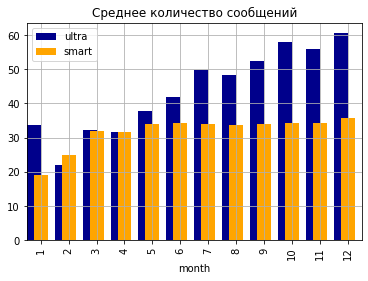

In [78]:
#График средних значений количества сообщений помесячно для тарифов ultra и smart
BarBuilder(data_messages_med_mean_ultra,data_messages_med_mean_smart,'Среднее количество сообщений','ultra','smart')
print('Среднее количество сообщений на тарифе Ultra:',int(round(data_messages_med_mean_ultra['mean'].mean(),0)),'СМС в месяц.')
print('Средняя количество сообщений на тарифе Smart:',int(round(data_messages_med_mean_smart['mean'].mean(),0)),'СМС в месяц.')

In [79]:
##Медианное и среднее количество интернет-трафика по месяцам - Ultra
data_mb_used_med_mean_ultra = data_services_ultra_wo_anomaly.groupby('month')['mb_used'].agg(['median','mean'])
data_mb_used_med_mean_ultra

,median,mean
month,,
1,14810.0,13154.666667
2,7338.0,11788.333333
3,17515.0,17553.513514
4,16662.0,16845.254545
5,18718.0,19383.194030
6,19497.0,18943.928571
7,20035.0,20516.571429
8,18949.0,19595.878505
9,19675.0,19224.043478


In [80]:
##Медианное и среднее количество интернет-трафика по месяцам - Smart
data_mb_used_med_mean_smart = data_services_smart_wo_anomaly.groupby('month')['mb_used'].agg(['median','mean'])
data_mb_used_med_mean_smart

,median,mean
month,,
1,7595.5,9020.687500
2,12640.0,12210.127273
3,15697.0,15131.207792
4,14498.0,13839.247706
5,16466.5,15941.057143
6,16217.5,15990.425000
7,16024.0,15922.934673
8,16866.5,16711.324786
9,16113.0,16512.404669


Среднее количество интернет-трафика на тарифе Ultra: 17.78 Гб в месяц.
Средняя количество интернет-трафика на тарифе Smart: 14.87 Гб в месяц.


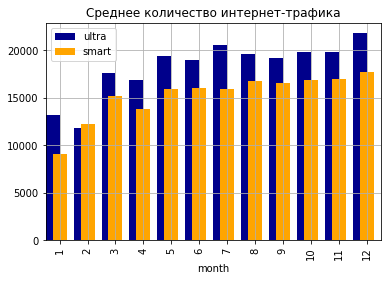

In [81]:
#График средних значений количества интернет-трафика помесячно для тарифов ultra и smart
BarBuilder(data_mb_used_med_mean_ultra,data_mb_used_med_mean_smart,'Среднее количество интернет-трафика','ultra','smart')
print('Среднее количество интернет-трафика на тарифе Ultra:',round(data_mb_used_med_mean_ultra['mean'].mean()/1024,2),'Гб в месяц.')
print('Средняя количество интернет-трафика на тарифе Smart:',round(data_mb_used_med_mean_smart['mean'].mean()/1024,2),'Гб в месяц.')

In [82]:
##Медианное и среднее значения выручки по месяцам - Ultra
data_money_med_mean_ultra = data_services_ultra_wo_anomaly.groupby('month')['money'].agg(['median','mean'])
data_money_med_mean_ultra

,median,mean
month,,
1,1950.0,1950.000000
2,1950.0,1973.095703
3,1950.0,2004.254645
4,1950.0,1995.474077
5,1950.0,2055.022738
6,1950.0,2032.109724
7,1950.0,2108.562092
8,1950.0,2071.230195
9,1950.0,2013.776749


In [83]:
##Медианное и среднее значения выручки по месяцам - Smart
data_money_med_mean_smart = data_services_smart_wo_anomaly.groupby('month')['money'].agg(['median','mean'])
data_money_med_mean_smart

,median,mean
month,,
1,550.000000,714.576904
2,550.000000,826.459375
3,878.593750,1133.213271
4,676.757812,945.372205
5,959.703125,1165.368694
6,905.714844,1156.263916
7,941.312500,1192.017627
8,1008.601562,1279.752337
9,950.781250,1225.548243


Средняя выручка на тарифе Ultra: 2037.14 руб. в месяц.
Средняя выручка на тарифе Smart: 1139.07 руб. в месяц.


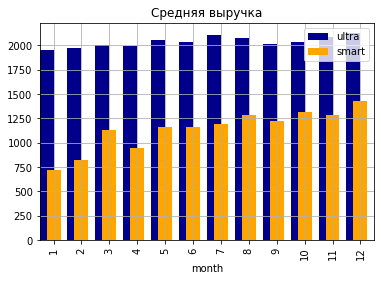

In [84]:
#График средних значений выручки помесячно для тарифов ultra и smart
BarBuilder(data_money_med_mean_ultra,data_money_med_mean_smart,'Средняя выручка','ultra','smart')
print('Средняя выручка на тарифе Ultra:',round(data_money_med_mean_ultra['mean'].mean(),2),'руб. в месяц.')
print('Средняя выручка на тарифе Smart:',round(data_money_med_mean_smart['mean'].mean(),2),'руб. в месяц.')

In [85]:
#Функция расчета дисперсии и стандартного отклонения
def Disp_Std(param):
    disp_param = np.var(param, ddof=1)
    std_param = np.std(param, ddof=1)
    print('Дисперсия:',disp_param,'/ Стандартное отклонение:',std_param)
    return [disp_param,std_param]

In [86]:
#Считаем дисперсию и стадартное отклонение среднего значения продолжительности звонков - Ultra
disp_std_duration_ultra = Disp_Std(data_duration_med_mean_ultra['mean'])

Дисперсия: 6268.237252635925 / Стандартное отклонение: 79.17219999871119


In [87]:
#Считаем дисперсию и стадартное отклонение среднего значения продолжительности звонков - Smart
disp_std_duration_smart = Disp_Std(data_duration_med_mean_smart['mean'])

Дисперсия: 4999.755274457824 / Стандартное отклонение: 70.70894762657569


In [88]:
#Считаем дисперсию и стадартное отклонение среднего значения количества СМС - Ultra
disp_std_messages_ultra = Disp_Std(data_messages_med_mean_ultra['mean'])

Дисперсия: 150.44368388530097 / Стандартное отклонение: 12.265548658144118


In [89]:
#Считаем дисперсию и стадартное отклонение среднего значения количества СМС - Smart
disp_std_messages_smart = Disp_Std(data_messages_med_mean_smart['mean'])

Дисперсия: 24.282697056603343 / Стандартное отклонение: 4.927747665678849


In [90]:
#Считаем дисперсию и стадартное отклонение среднего значения интернет-трафика - Ultra
disp_std_mb_used_ultra = Disp_Std(data_mb_used_med_mean_ultra['mean'])

Дисперсия: 8856494.007589515 / Стандартное отклонение: 2975.9862243615166


In [91]:
#Считаем дисперсию и стадартное отклонение среднего значения интернет-трафика - Smart
disp_std_mb_used_smart = Disp_Std(data_mb_used_med_mean_smart['mean'])

Дисперсия: 6048548.711799537 / Стандартное отклонение: 2459.3797412761487


In [92]:
#Считаем дисперсию и стадартное отклонение среднего значения выручки - Ultra
disp_std_money_ultra = Disp_Std(data_money_med_mean_ultra['mean'])

Дисперсия: 2866.8888090133078 / Стандартное отклонение: 53.54333580393836


In [93]:
#Считаем дисперсию и стадартное отклонение среднего значения выручки - Smart
disp_std_money_smart = Disp_Std(data_money_med_mean_smart['mean'])

Дисперсия: 44003.06386881833 / Стандартное отклонение: 209.76907271763952


## Выводы по шагу 3

Напомним условия тарифов:

* Smart: ежемесячная плата 550 р. (500 минут, 50 сообщений, 15 Гб). Сверх пакета: минута - 3 р., сообщение - 3 р., 1 Гб - 200 р.
* Ultra: ежемесячная плата 1950 р. (3000 минут, 1000 сообщений, 30 Гб). Сверх пакета: минута - 1 р., сообщение - 1 р., 1 Гб - 150 р.

<b>Выводы:</b>

1. Среднее значение и медиана в общей таблице data_services не сильно расходятся, что говорит о том, что в выборке мало редких и выбивающихся значений (duration: 463/456, messages: 38/30, mb_used: 17233/16969, money: 1486/1563).
   Это подвердилось при отбросе редких и выпадающих значений с помощью диаграмм размаха: для тарифа Ultra отбросили 1 запись, 
   для тарифа Smart - 37.
   

2. Общая гистограмма в основном формируется за счет пользователей более дешевого тарифа Smart - в выборке их вдвое больше чем пользователей Ultra (351 против 149). Но на больших значениях - уже за счет пользователей Ultra (у них пакет больше).


3. Продолжительность звонков: 

    Гистограмма нормального распределения.
    
    Есть пропуски, т.е. пользователи не звонят - возможно, сим-карты используются для интернета вещей (в трекерах и т.п.).
    
    Для пользователей Ultra медианное значение продолжительности звонков лежит в районе 500 минут, для пользователей Smart - в районе 400. Гистограмма у Ultra более сглаженная, поведение пользователей более разнообразное. 
    
    Максимальное значение продолжительности звонков - 1727 минуты. Т.е. 3000 минут, которые идут в пакете Ultra, явно избыточны.
    

4. СМС: 

    Гистограмма распределения Пуассона, на 0 большой пик - СМС-ки больше никто не пишет, все в мессенджерах и соцсетях.
    
    Медианное значение количества СМС - 28 для Smart, 38 для Ultra.
    
    Максмальное количество сообщений - 224, т.е. пакет в 1000 сообщений на тарифе Ultra более чем избыточен.
    

5. Интернет-трафик:

    Гистограмма нормального распределения.
    
    Медианное значение интернет-трафика для пользователей Smart - в районе 16 Гб, для пользователей Ultra - в районе 19 Гб и гистограмма более сглаженная (лимит не поджимает).
    
    Судя по медийным значениям, пакет в 15 Гб на тарифе Smart маловат и пользователям приходится брать гигабайты сверх пакета. 
    
    
6. Выручка:    
    
    Общая гистограмма выручки получилась с двумя пиками, потому что у нас два разных по цене тарифа. При построении гистограмм отдельно для каждого тарифа видим распределение Пуассона, где начальное значение по оси X - базовая цена пакета услуг согласно тарифа.

    Судя по медианным значениям выручки (Smart- 987, Ultra - 1950), пользователям Ultra их пакета хватает за глаза, а пользователям более дешевого Smart все время приходится идти на дополнительные траты - докупать интернет-трафика. 
    
    Коэффициенты корреляции Пирсона показывают, что больше всего влияет на выручку интернет-трафик (0.6 для Ultra и 0.8 для Smart).
    
    
7. Посчитали среднее количество:
    * Средняя продолжительность звонков на тарифе Ultra/Smart, минут в месяц: 509 / 401
    * Среднее количество сообщений на тарифе Ultra/Smart, СМС в месяц: 44 / 32 
    * Среднее количество интернет-трафика на тарифе Ultra/Smart, Гб в месяц: 17.78 / 14.87
    * Средняя выручка на тарифе Ultra/Smart, руб. в месяц: 2037.14 / 1139.07
    
    
8. Посчитали дисперсию:
    * Дисперсия для средней продолжительности звонков на тарифе Ultra/Smart: 6268.23 / 4999.75
    * Дисперсия для среднего количества сообщений на тарифе Ultra/Smart: 150.44 / 24.28 
    * Дисперсия для среднего количества интернет-трафика на тарифе Ultra/Smart: 8856494 / 6048548.71
    * Дисперсия для средней выручки на тарифе Ultra/Smart: 2866.89 / 44003.06 
    

9. Посчитали стандартное отклонение:
    * Стандартное отклонение для средней продолжительности звонков на тарифе Ultra/Smart: 79.17 / 70.70
    * Стандартное отклонение для среднего количества сообщений на тарифе Ultra/Smart: 12.26 / 4.92 
    * Стандартное отклонение для среднего количества интернет-трафика на тарифе Ultra/Smart: 2975.98 / 2459.37
    * Стандартное отклонение для средней выручки на тарифе Ultra/Smart: 53.54 / 209.76
    
---

## Шаг 4. Проверим гипотезы
Проверим гипотезы, что:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [94]:
#Критический уровень статистической значимости
alpha = 0.01 #1%

In [96]:
###Гипотезы о средней выручке пользователей тарифов «Ультра» и «Смарт»
##Гипотеза о равенстве средних двух выборок
#Нулевая гипотеза: средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»
#Альтернативная гипотеза: средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»

money_result = st.ttest_ind(
    data_services_ultra_wo_anomaly['money'], 
    data_services_smart_wo_anomaly['money'],
    equal_var = True)

print('p-value:',money_result.pvalue)

if (money_result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, что средняя выручка пользователей тарифа Ultra равна средней выручке пользователей тарифа Smart")
else:
    print("Не получилось отвергнуть нулевую гипотезу, что средняя выручка пользователей тарифа Ultra равна средней выручке пользователей тарифа Smart")

p-value: 1.0864355534198419e-206
Отвергаем нулевую гипотезу, что средняя выручка пользователей тарифа Ultra равна средней выручке пользователей тарифа Smart


In [97]:
#Добавляем к датасету data_services столбец group_city с двумя категориями - Москва и Другой
data_services['group_city'] = data_services['city'].where(data_services['city'] == 'Москва', 'Другой')

In [98]:
#делим датасет на два в зависимости от города
data_services_msk = data_services.query('group_city == "Москва"').reset_index(drop=True)
data_services_other = data_services.query('group_city == "Другой"').reset_index(drop=True)

Отбрасываем значения money < 550.0 и > 3726.0


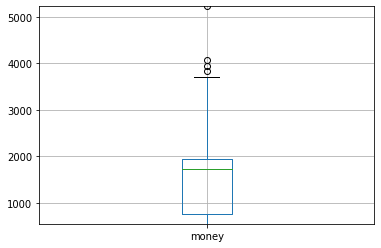

In [99]:
#Уберём редкие и выбивающиеся значения для выручки в Москве
garbage_money = BoxplotBuilder(data_services_msk,'money')
data_services_msk_wo_anomaly = data_services_msk.query('money >= @garbage_money[0] and money <= @garbage_money[1]')

Отбрасываем значения money < 550.0 и > 3816.28125


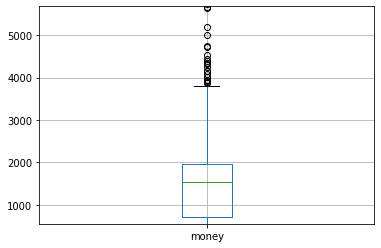

In [100]:
#Уберём редкие и выбивающиеся значения для выручки в других регионах
garbage_money = BoxplotBuilder(data_services_other,'money')
data_services_other_wo_anomaly = data_services_other.query('money >= @garbage_money[0] and money <= @garbage_money[1]')

In [101]:
print('Было записей по Москве:',len(data_services_msk),'Стало:',len(data_services_msk_wo_anomaly))
print('Было записей по другим:',len(data_services_other),'Стало:',len(data_services_other_wo_anomaly))

Было записей по Москве: 611 Стало: 607
Было записей по другим: 2603 Стало: 2579


In [102]:
##Медианное и среднее значения выручки по месяцам - Москва
data_money_med_mean_msk = data_services_msk_wo_anomaly.groupby('month')['money'].agg(['median','mean'])
data_money_med_mean_msk

,median,mean
month,,
1,1950.000000,1460.794922
2,710.601562,1154.977818
3,1950.000000,1608.340332
4,1950.000000,1476.250943
5,1370.312500,1434.237230
6,1741.000000,1477.710688
7,1558.886719,1420.709717
8,1863.351562,1572.016885
9,1884.550781,1527.558967


In [103]:
##Медианное и среднее значения выручки по месяцам - Другой
data_money_med_mean_other = data_services_other_wo_anomaly.groupby('month')['money'].agg(['median','mean'])
data_money_med_mean_other

,median,mean
month,,
1,550.000000,852.288616
2,746.500000,1151.321662
3,1499.667969,1374.979118
4,1102.394531,1243.734545
5,1505.203125,1437.949963
6,1510.421875,1439.485205
7,1418.750000,1474.706433
8,1544.375000,1485.145307
9,1579.953125,1447.316661


Средняя выручка от пользователей из Москвы: 1473.83 руб. в месяц.
Средняя выручка от пользователей из других регионов: 1379.97 руб. в месяц.


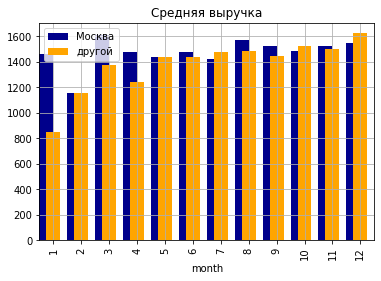

In [104]:
BarBuilder(data_money_med_mean_msk,data_money_med_mean_other,'Средняя выручка','Москва','другой')
print('Средняя выручка от пользователей из Москвы:',round(data_money_med_mean_msk['mean'].mean(),2),'руб. в месяц.')
print('Средняя выручка от пользователей из других регионов:',round(data_money_med_mean_other['mean'].mean(),2),'руб. в месяц.')

In [105]:
#Критический уровень статистической значимости
alpha = 0.05 #5%

In [107]:
###Гипотезы о средней выручке пользователей из Москвы и из других регионов
##Гипотеза о равенстве средних двух генеральных совокупностей
#Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
#Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

money_result = st.ttest_ind(
    data_services_msk_wo_anomaly['money'], 
    data_services_other_wo_anomaly['money'],
    equal_var = True)

print('p-value:',money_result.pvalue)

if (money_result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов")
else:
    print("Не получилось отвергнуть нулевую гипотезу, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов")

p-value: 0.31453618549374196
Не получилось отвергнуть нулевую гипотезу, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов


## Выводы по шагу 4

1. Проверили гипотезу, что средняя ежемесячная выручка пользователей тарифов «Ультра» и «Смарт» различается.

    В данном случае у нас двусторонняя гипотеза, т.е. не проверяем выручка на каком тарифе больше, а просто проверим, что она различается.
    
    Сформулировали нулевую гипотезу, что средняя выручка пользователей тарифа Ultra равна средней выручке пользователей тарифа Smart.
    
    Сфорулировали альтернативную гипотезу, что средняя выручка пользователей тарифа Ultra не равна средней выручке пользователей тарифа Smart.
    
    Уровень значимости (alpha) установили равным 1% (ранее считали среднюю выручку на тарифе Ultra и на тарифе Smart, она равна 2037.14 руб/мес и 1139.07 руб/мес - разница в 900 руб. - как бы заранее понятно, что вероятность подтверждения нулевой гипотезы весьма мала).

    После проверки гипотезы по методу scipy.stats.ttest_ind получили p-value практически равный 0 (1.0864355534198419e-206), нулевую гипотезу смело отвергаем - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.



2. Проверили двустороннюю гипотезу, что средняя ежемесячная выручка пользователей из Москвы отличается от средней выручки пользователей из других городов.

    Для этого дополнительно добавили в основной датасет data_services столбец с двумя категориями (Москва/Другой), разбили датасет на два (Москва/Другой), убрали выпадающие значения, посчитали средние значения.
    
    Сформулировали нулевую гипотезу, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
    
    Сфорулировали альтернативную гипотезу, что средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.
    
    Уровень значимости (alpha) установили равным 5% (ранее считали среднюю выручку в Москве и в других регионах, получили 1473.83 руб/мес и 1379.97 руб/мес соответственно, разница несущественная, порядка ста рублей, ожидаем, что нулевая гипотеза подтвердится).
    
    После проверки гипотезы по методу scipy.stats.ttest_ind получили довольно большой уровень значимости для статистики разности p-value = 31% (0.31453618549374196), с которым трудно поспорить и нулевая гипотеза подтверждается - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

---

## Шаг 5. Общий вывод

Так какой же тариф приносит больше денег - Ultra или Smart?

Средняя ежемесячная выручка от отдельно взятого пользователя на тарифе Ultra больше, чем на тарифе Smart. Для Ultra это 2037.14 руб/мес, а для Smart - 1139.07 руб/мес - разница в выручке между тарифами около 900 р. Но в выборке пользователей Smart в два раза больше чем пользователей Ultra - соответственно в сумме пользователи Smart принесут больше выручки чем пользователи Ultra. Для более точного расчета надо бы конечно оценить соотношение пользователей Ultra/Smart по всей совокупности, а не по отдельной выборке.

Хотя, судя по тому, что тариф Smart дешевле, услуг, входящих в пакет, пользователю на месяц вполне хватает (а если приходится докупать, все равно это выходит дешевле, чем пришлось бы отдать за тариф Ultra), то соответственно тариф Smart популярнее, а значит, вполне вероятно, что и по всей совокупности картина такая же - пользователей Smart в несколько раз больше, чем пользователей Ultra, а значит, и суммарная выручка от Smart больше, чем от Ultra.

С другой стороны, тариф Ultra более чем избыточен, его пользователь тратит в лучшем случае половину оплаченных им услуг, а значит, все, что он не использовал, можно продать кому-то еще. 

Но эти два фактора - избыточность и высокая цена, отпугивают пользователей, потому тариф Ultra вряд ли когда станет популярным и привлечет много клиентов. А в нынешних реалиях большая вероятность, что даже текущие пользователи Ultra начнут отказываться от него в пользу более дешевых тарифов.

Предварительно можно сделать вывод, что тариф Smart лучше и суммарно приносит больше денег. Но хотелось бы копнуть поглубже - оценить себестоимость услуг, посчитать чистую прибыль, а потом уже делать окончательные выводы.